### 📊 Imbalanced data

This notebook show data imbalance,  under-sampling, and over-sampling using the Iris dataset available in scikit-learn

In [1]:
# !pip install scikit-learn
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the Iris dataset
iris = load_iris(as_frame=True)
# Convert to a pandas DataFrame for easier handling
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head()   

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Create an imbalanced dataset

In [4]:
from imblearn.datasets import make_imbalance

sampling_strategy = {0: 10, 1: 20, 2: 47}
X, y = make_imbalance(iris.data, iris.target, sampling_strategy=sampling_strategy)

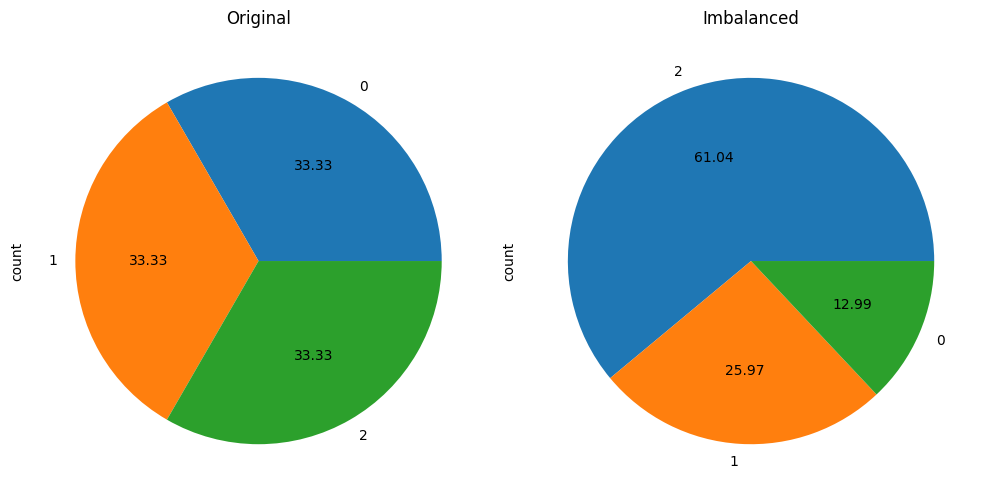

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
autopct = "%.2f"
iris.target.value_counts().plot.pie(autopct=autopct, ax=axs[0])
axs[0].set_title("Original")
y.value_counts().plot.pie(autopct=autopct, ax=axs[1])
axs[1].set_title("Imbalanced")
fig.tight_layout()

#### 📉 Under-sampling

In [6]:
# select only 2 classes since the ratio make sense in this case
binary_mask = y.isin([0, 1])
binary_y = y[binary_mask]
binary_X = X[binary_mask]

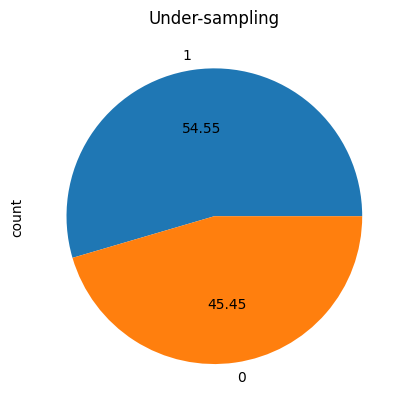

In [7]:
from imblearn.under_sampling import RandomUnderSampler

sampling_strategy = 0.8 # resample the majority class to 80% of the minority class
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(binary_X, binary_y)
ax = y_res.value_counts().plot.pie(autopct=autopct)
_ = ax.set_title("Under-sampling")

#### 📈 Over-sampling

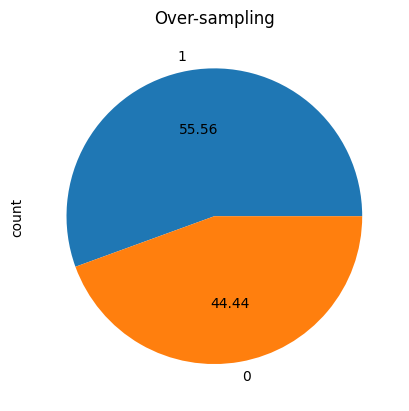

In [8]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=sampling_strategy)
X_res, y_res = ros.fit_resample(binary_X, binary_y)
ax = y_res.value_counts().plot.pie(autopct=autopct)
_ = ax.set_title("Over-sampling")

### ⚖️ `sampling_strategy`  as a `str`

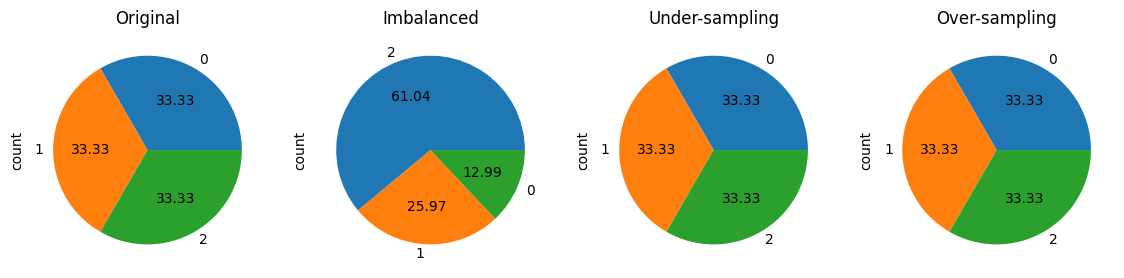

In [9]:
sampling_strategy = "not minority"

fig, axs = plt.subplots(ncols=4, figsize=(14, 7))
iris.target.value_counts().plot.pie(autopct=autopct, ax=axs[0])
axs[0].set_title("Original")

y.value_counts().plot.pie(autopct=autopct, ax=axs[1])
axs[1].set_title("Imbalanced")

rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(X, y)
y_res.value_counts().plot.pie(autopct=autopct, ax=axs[2])
axs[2].set_title("Under-sampling")

sampling_strategy = "not majority"
ros = RandomOverSampler(sampling_strategy=sampling_strategy)
X_res, y_res = ros.fit_resample(X, y)
y_res.value_counts().plot.pie(autopct=autopct, ax=axs[3])
_ = axs[3].set_title("Over-sampling")